In [29]:
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
print(plt.rcParams["axes.prop_cycle"])

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


(6010, 512)
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.002s...
[t-SNE] Computed neighbors for 6010 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed conditional probabilities for sample 2000 / 6010
[t-SNE] Computed conditional probabilities for sample 3000 / 6010
[t-SNE] Computed conditional probabilities for sample 4000 / 6010
[t-SNE] Computed conditional probabilities for sample 5000 / 6010
[t-SNE] Computed conditional probabilities for sample 6000 / 6010
[t-SNE] Computed conditional probabilities for sample 6010 / 6010
[t-SNE] Mean sigma: 1.714806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.076347
[t-SNE] KL divergence after 300 iterations: 2.495999
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.001s...
[t-SNE] Computed neighbors for 6010 samples in 0.225s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed

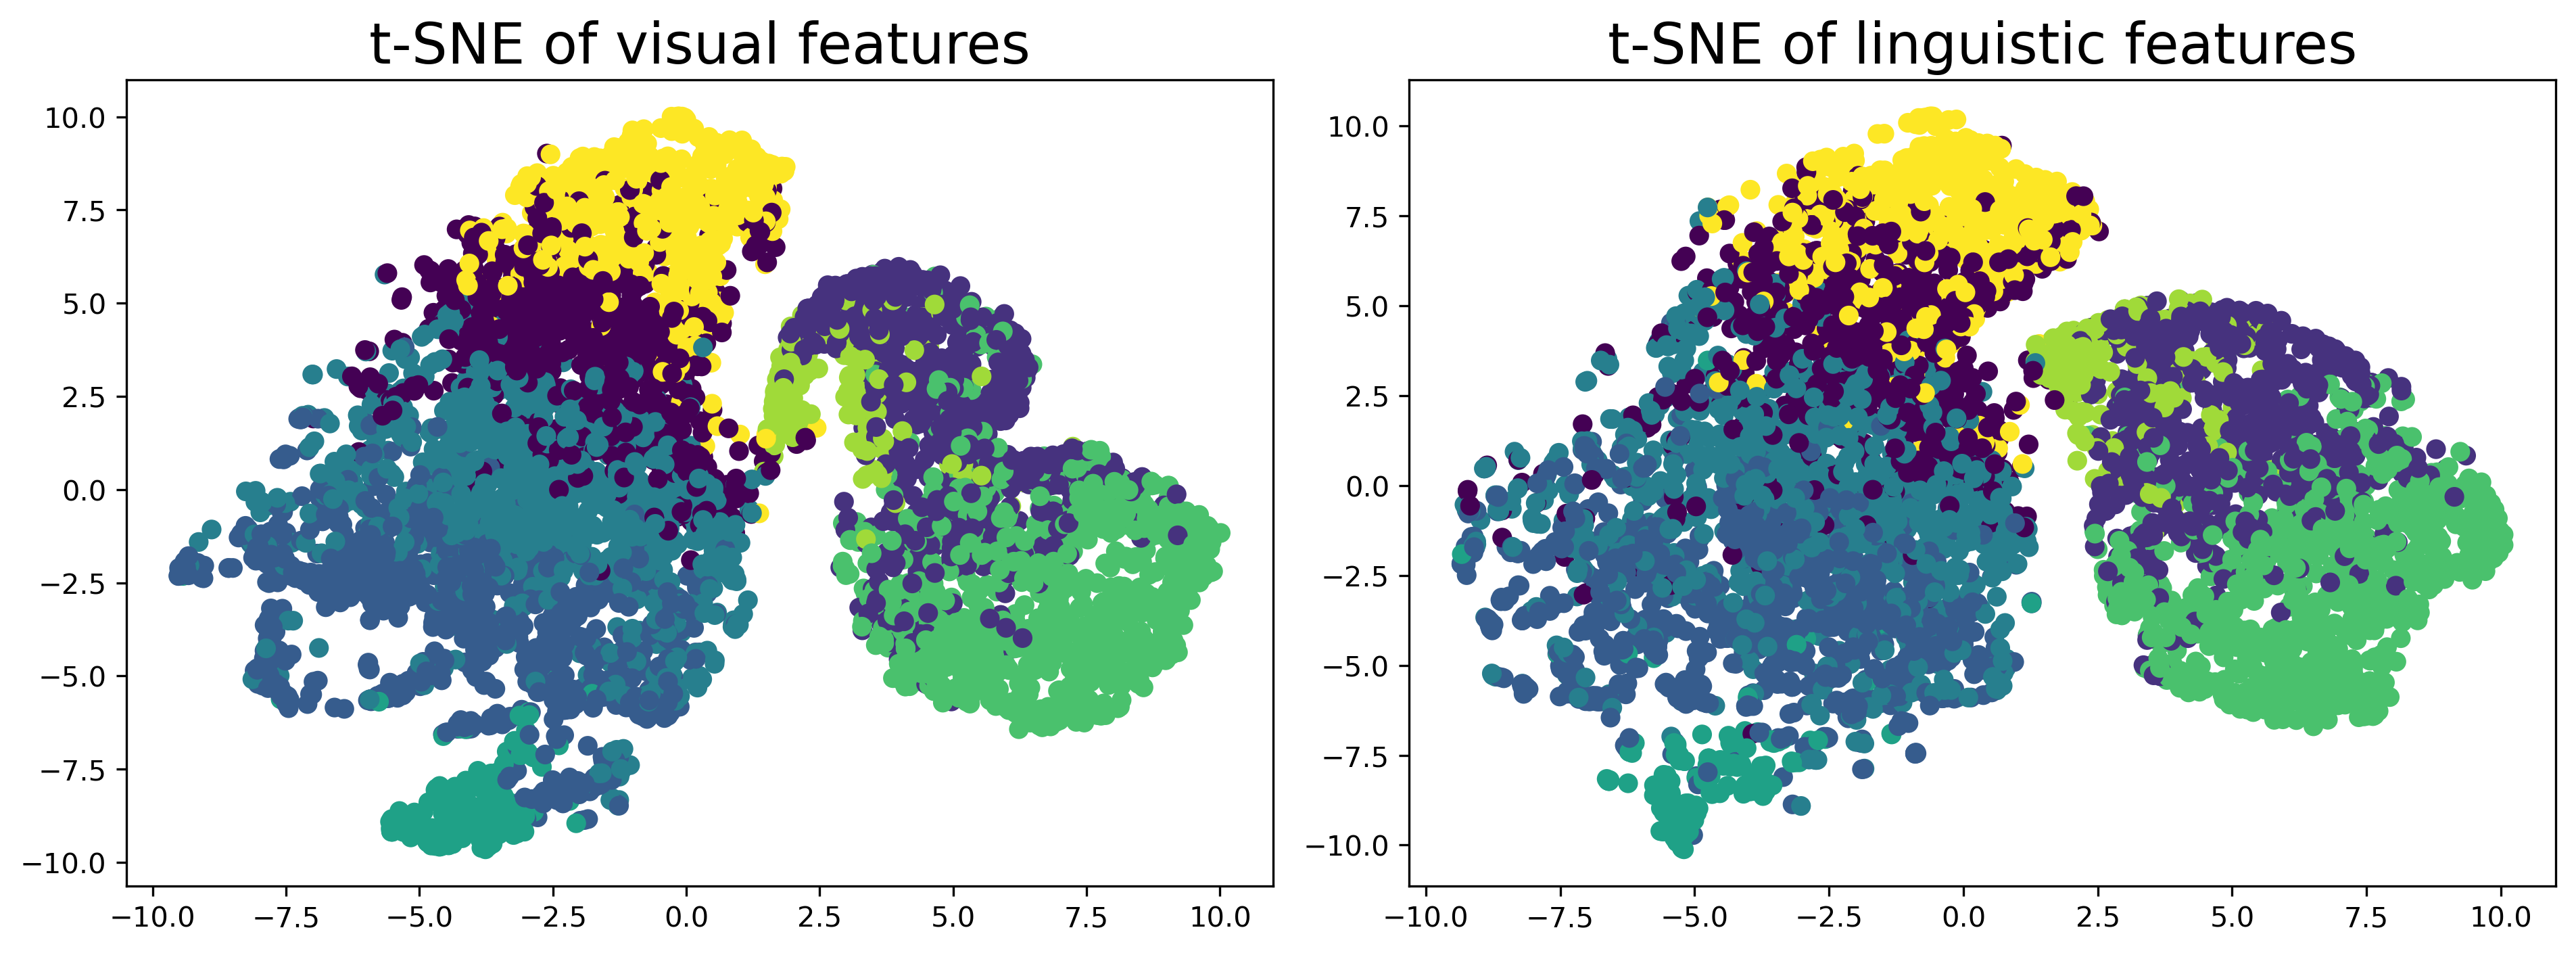

In [2]:
# time.sleep(120)
feature_root = "/root/autodl-tmp/data"
cluster_num = 8
CMAP = "viridis"

rgb_cls = np.load(os.path.join(feature_root, "rgb_cls.npy"))
depth_cls = np.load(os.path.join(feature_root, "depth_cls.npy"))
inst_cls = np.load(os.path.join(feature_root, "inst_cls.npy"))
sub_cls = np.load(os.path.join(feature_root, "sub_cls.npy"))
positive_idx = np.load(os.path.join(feature_root, "positive_idx.npy"))
color_map = np.load(os.path.join(feature_root, "tmp/color_map1.npy"))
FS = 20
rgb_cls = (rgb_cls+depth_cls)/2 # Visual features
inst_cls = (inst_cls+sub_cls)/2 # Linguistic features
print(rgb_cls.shape)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(6.4*2, 4.8), dpi=300)
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results = tsne.fit_transform(rgb_cls)
axes[0].scatter(tsne_results[:, 0] ,tsne_results[:, 1], c=color_map, cmap=CMAP)
axes[0].set_title("t-SNE of visual features", fontsize=FS)
# axes[0].set_axis_off()
# axes[0].set_xticks([])

tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results = tsne.fit_transform(inst_cls)
axes[1].scatter(tsne_results[:, 0] ,-tsne_results[:, 1], c=color_map, cmap=CMAP)
axes[1].set_title("t-SNE of linguistic features", fontsize=FS)
# axes[1].set_axis_off()
plt.tight_layout()
plt.savefig("feature_visualization.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.savefig("feature_visualization.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


In [37]:
a = set()
for i,v in enumerate(color_map):
    if positive_idx[i]:
        a.add(v)
print(a)
# Left parts of t-SNE are positive clusters

{0, 2, 3, 4, 7}


In [48]:
rgb_cls_norm = rgb_cls/ np.linalg.norm(rgb_cls, axis=1, keepdims=True)
inst_cls_norm = inst_cls/ np.linalg.norm(inst_cls, axis=1, keepdims=True)
cos_score = (rgb_cls_norm*inst_cls_norm).sum(axis=1)

In [49]:
cos_score

array([0.9599566 , 0.97000295, 0.95916444, ..., 0.9785455 , 0.96815366,
       0.97310334], dtype=float32)

In [30]:
import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation, FFMpegWriter

feature_root = "/root/autodl-tmp/data"
cluster_num = 8
CMAP = "viridis"

rgb_cls = np.load(os.path.join(feature_root, "rgb_cls.npy"))
depth_cls = np.load(os.path.join(feature_root, "depth_cls.npy"))
inst_cls = np.load(os.path.join(feature_root, "inst_cls.npy"))
sub_cls = np.load(os.path.join(feature_root, "sub_cls.npy"))
positive_idx = np.load(os.path.join(feature_root, "positive_idx.npy"))
color_map = np.load(os.path.join(feature_root, "tmp/color_map1.npy"))
FS = 20
rgb_cls = (rgb_cls+depth_cls)/2 # Visual features
inst_cls = (inst_cls+sub_cls)/2 # Linguistic features
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results0 = tsne.fit_transform(rgb_cls)
# axes[0].set_axis_off()
# axes[0].set_xticks([])

tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results1 = tsne.fit_transform(inst_cls)
# axes[1].scatter(tsne_results[:, 0] ,-tsne_results[:, 1], c=color_map, cmap=CMAP)
# axes[1].set_title("t-SNE of linguistic features", fontsize=FS)
# axes[1].set_axis_off()
# plt.tight_layout()
# plt.savefig("feature_visualization.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
# plt.savefig("feature_visualization.png", dpi=300, bbox_inches="tight", pad_inches=0)
# plt.show()


[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.002s...
[t-SNE] Computed neighbors for 6010 samples in 0.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed conditional probabilities for sample 2000 / 6010
[t-SNE] Computed conditional probabilities for sample 3000 / 6010
[t-SNE] Computed conditional probabilities for sample 4000 / 6010
[t-SNE] Computed conditional probabilities for sample 5000 / 6010
[t-SNE] Computed conditional probabilities for sample 6000 / 6010
[t-SNE] Computed conditional probabilities for sample 6010 / 6010
[t-SNE] Mean sigma: 1.714806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.075806
[t-SNE] KL divergence after 300 iterations: 2.495804
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.001s...
[t-SNE] Computed neighbors for 6010 samples in 0.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed conditional

  0%|          | 0/60 [00:00<?, ?it/s]

/tmp/ipykernel_53505/4081970491.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  res0 = axes[0].scatter([], [], cmap=CMAP)
/tmp/ipykernel_53505/4081970491.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  res1 = axes[1].scatter([], [], cmap=CMAP)


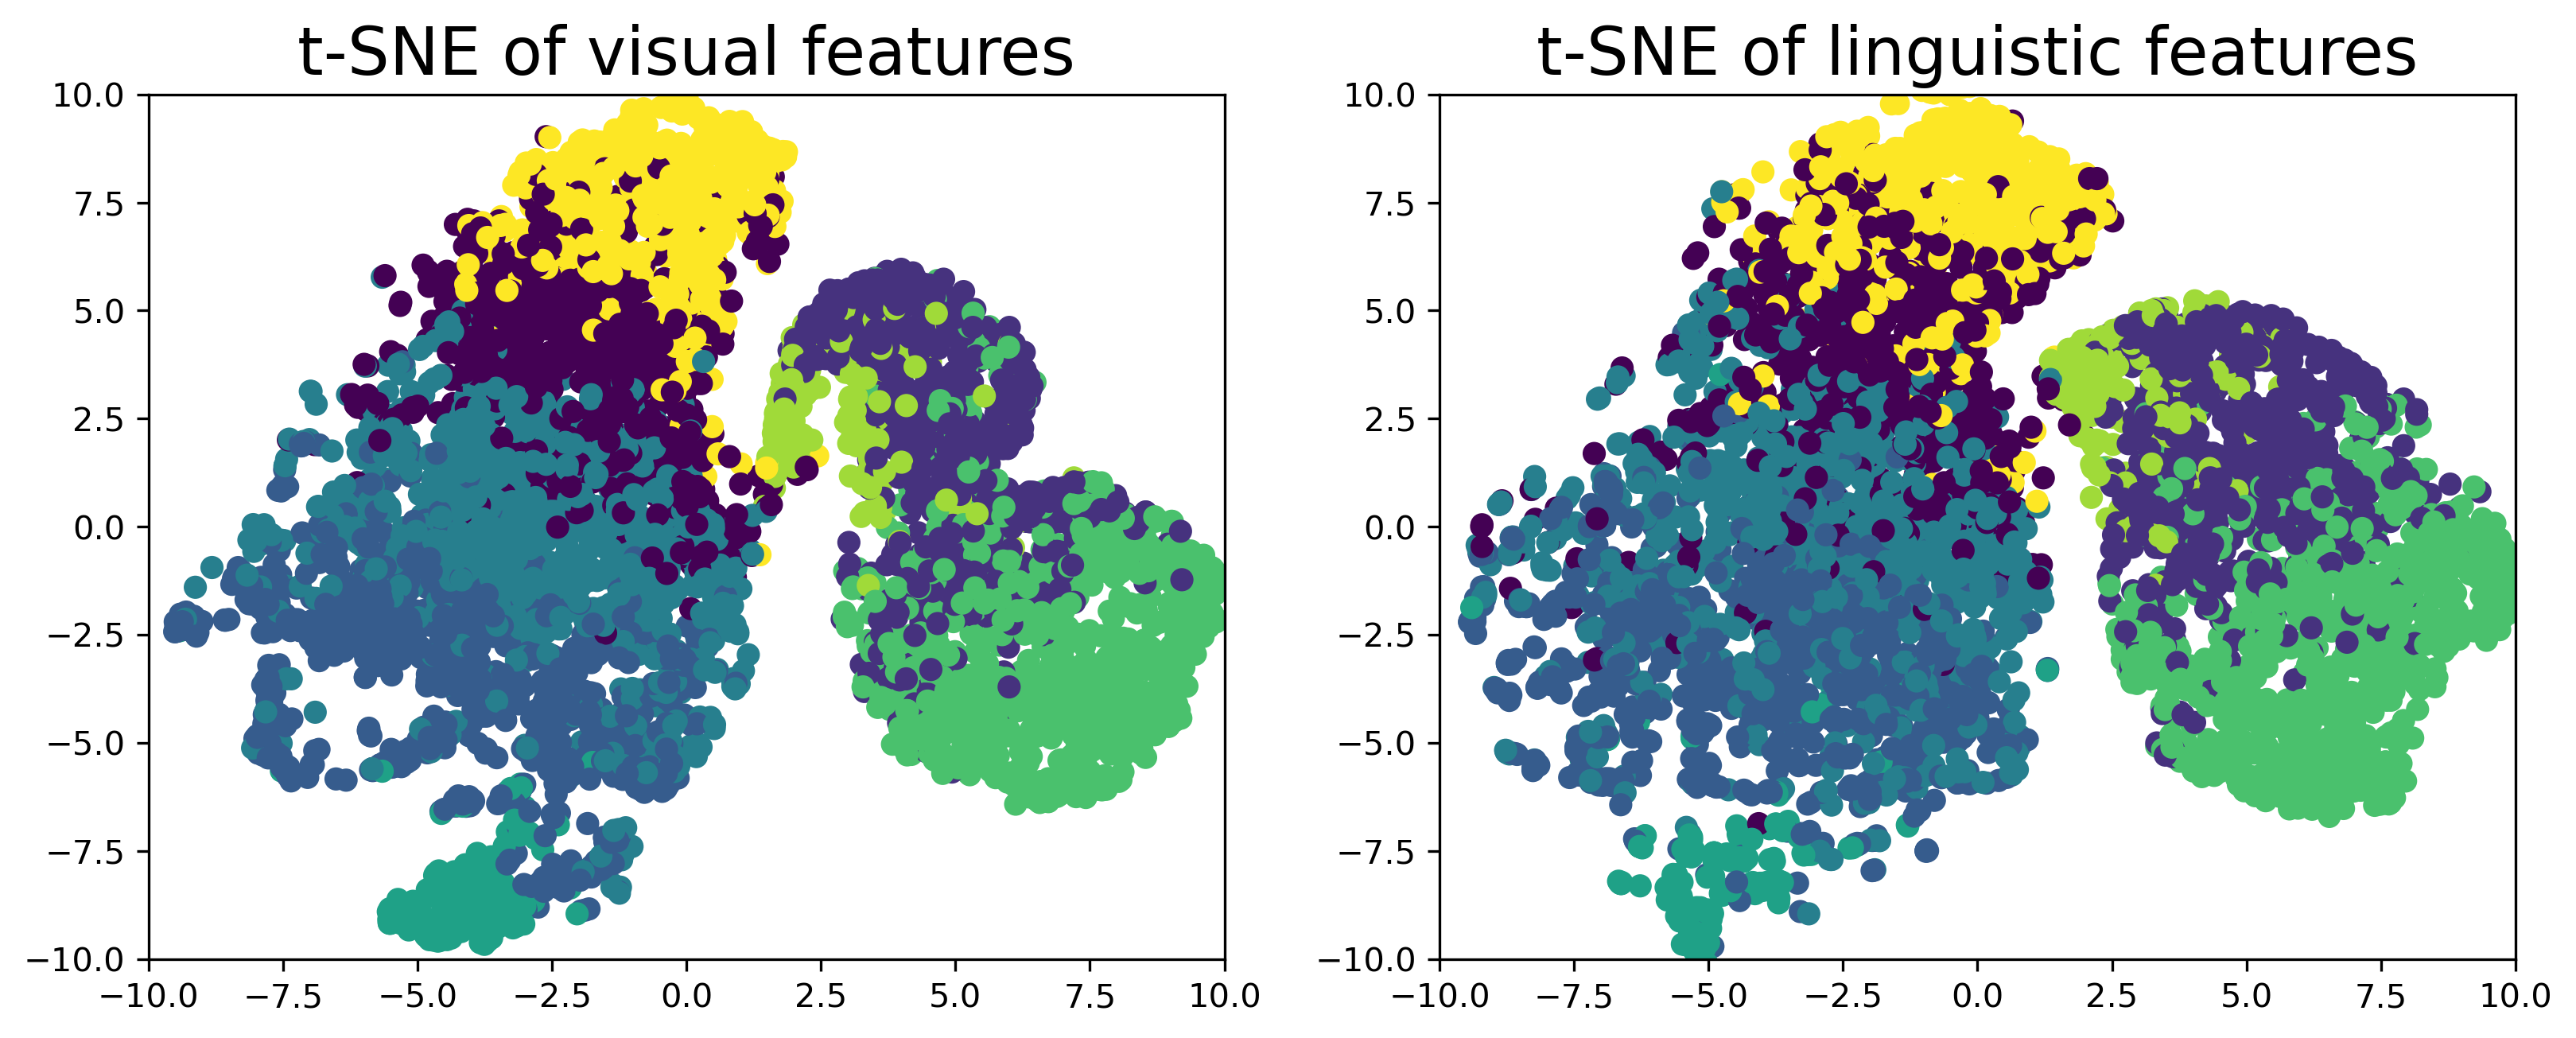

In [31]:
from tqdm.notebook import tqdm

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(6.4*2, 4.8), dpi=300)
axes[0].set_title("t-SNE of visual features", fontsize=FS)
axes[0].set_xlim([-10.0, 10.0])
axes[0].set_ylim([-10.0, 10.0])

axes[1].set_title("t-SNE of linguistic features", fontsize=FS)
axes[1].set_xlim([-10.0, 10.0])
axes[1].set_ylim([-10.0, 10.0])
stride = 100
frames = len(tsne_results0)//stride
bar = tqdm(range(frames))

def update(j):
    # This way the plot can continuously run and we just keep
    # watching new realizations of the process
    if j==0:
        res0 = axes[0].scatter([], [], cmap=CMAP)
        res1 = axes[1].scatter([], [], cmap=CMAP)
    else:
        i = j-1
        res0 = axes[0].scatter(tsne_results0[i*stride:(i+1)*stride, 0], tsne_results0[i*stride:(i+1)*stride, 1], c=color_map[i*stride:(i+1)*stride], cmap=CMAP)
        res1 = axes[1].scatter(tsne_results1[i*stride:(i+1)*stride, 0], -tsne_results1[i*stride:(i+1)*stride, 1], c=color_map[i*stride:(i+1)*stride], cmap=CMAP)
    bar.update()
    return [res0, res1]

# Fixing random state for reproducibility
np.random.seed(19680801)

fps = 30
anim = FuncAnimation(fig, update, frames=frames, interval=1000/fps)
writer = FFMpegWriter(fps=fps)
 
anim.save("test.mp4", writer, dpi=600)

# plt.show()
# plt.savefig("tmp.png", dpi=600)

In [57]:
plt.rcParams['font.family']

['sans-serif']

/tmp/ipykernel_53505/2678249359.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(ytl, fontsize=FS-2)
/tmp/ipykernel_53505/2678249359.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(ytl, fontsize=FS-2)


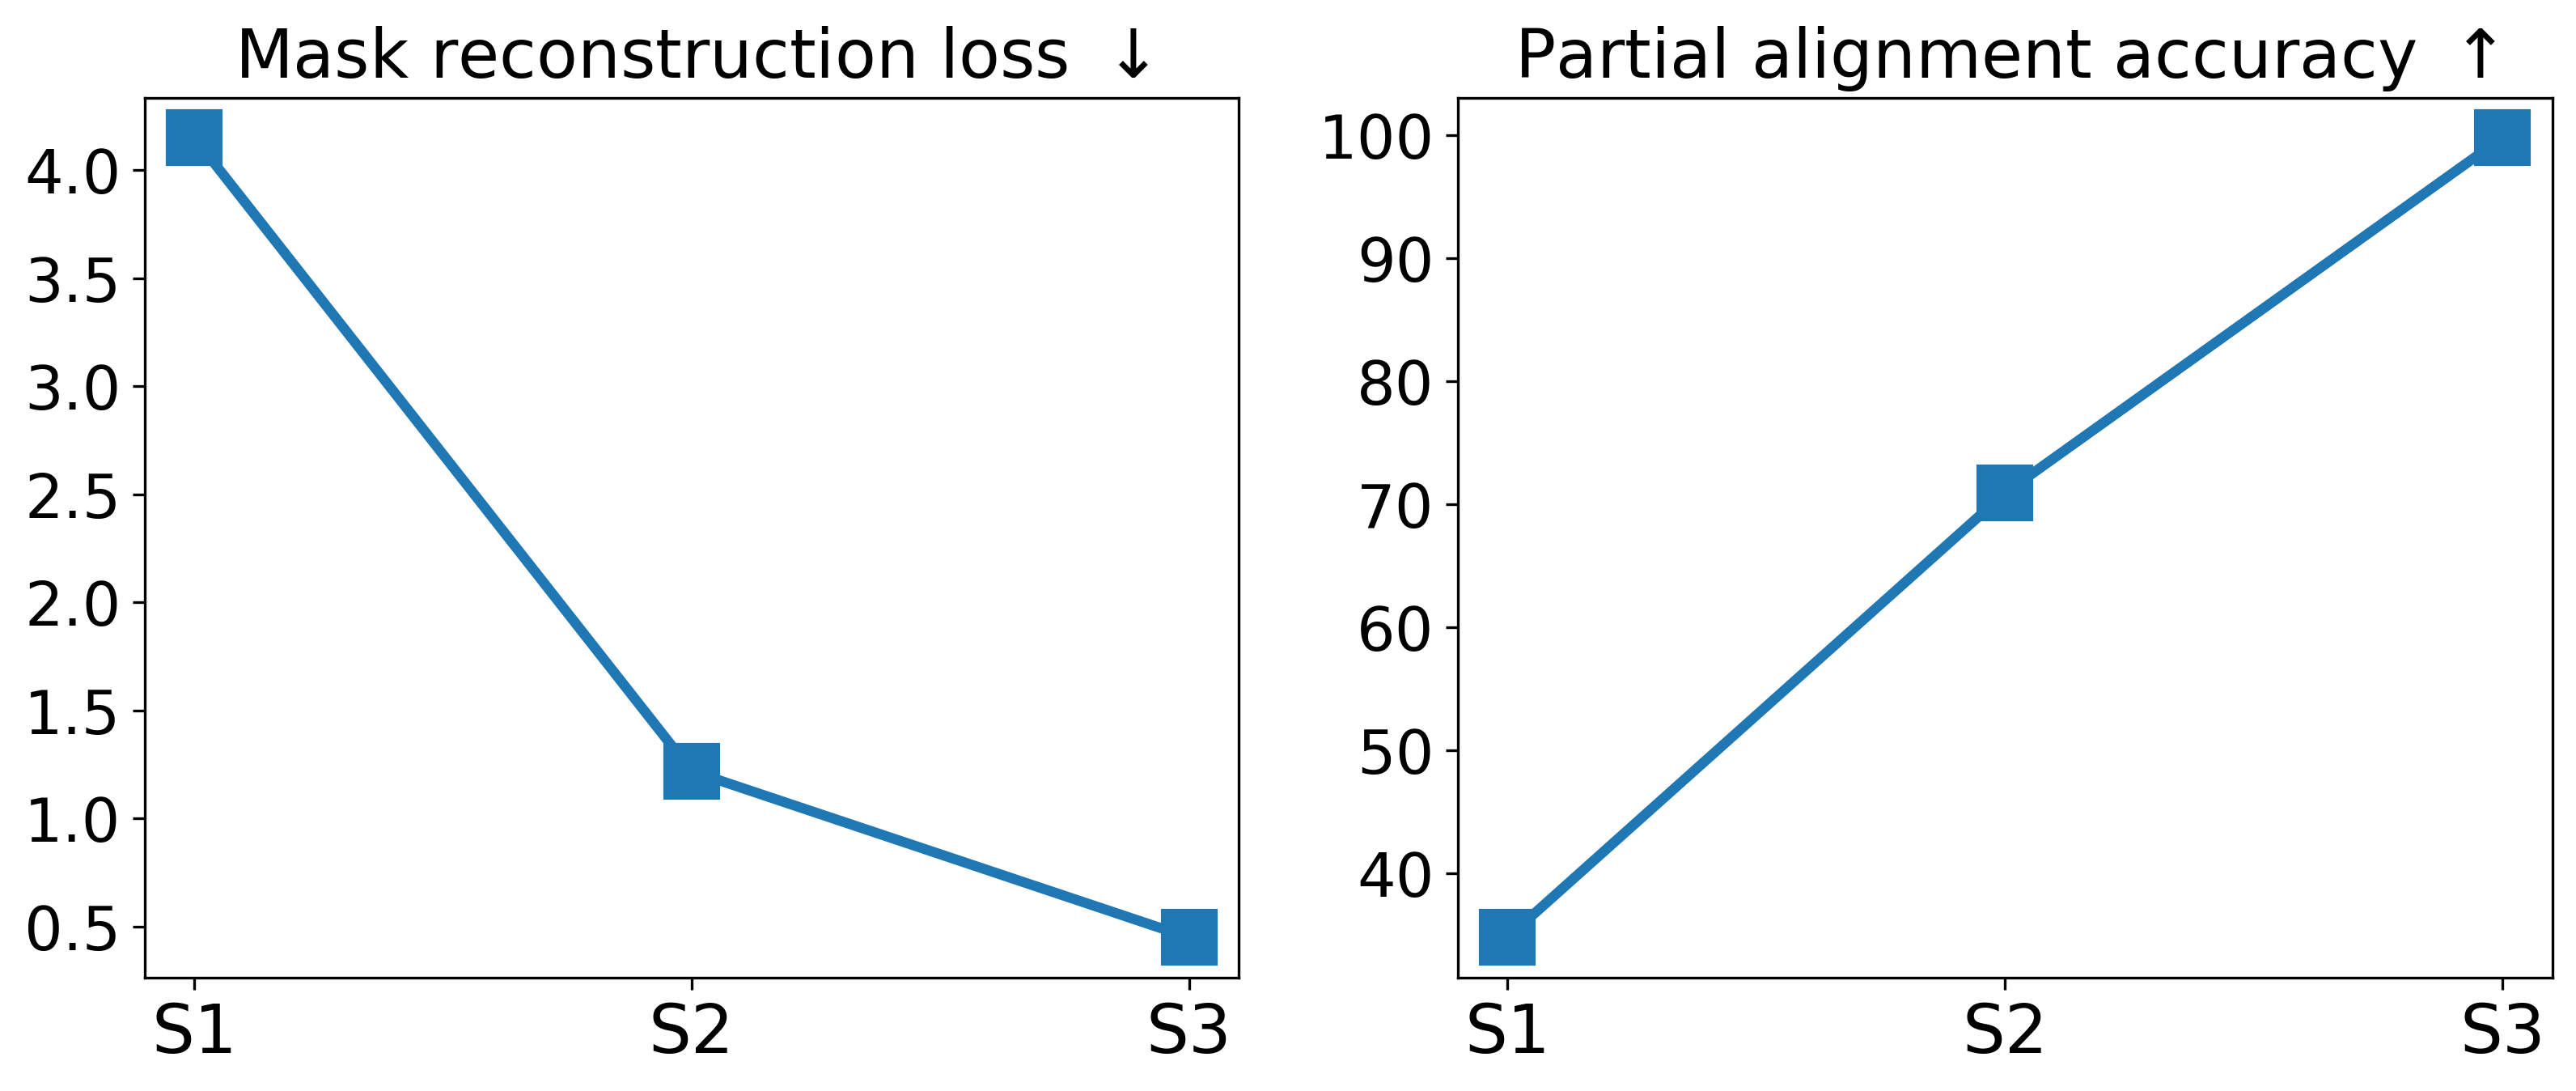

In [27]:
import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation, FFMpegWriter
FS= 20
l_reco = [4.15, 1.22, 0.45]
a_part = [34.79, 70.90, 99.78]
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(6.4*2, 4.8), dpi=300)
axes[0].plot(l_reco, marker="s", markersize=16, linewidth=3)
axes[0].set_xticks([0,1,2], ["S1","S2","S3"], fontsize=FS)
ytl = axes[0].get_yticklabels()
axes[0].set_yticklabels(ytl, fontsize=FS-2)
axes[0].set_title(r"Mask reconstruction loss $\downarrow$", fontsize=FS)


axes[1].plot(a_part, marker="s", markersize=16, linewidth=3)
axes[1].set_xticks([0,1,2], ["S1","S2","S3"], fontsize=FS)
ytl = axes[1].get_yticklabels()
axes[1].set_yticklabels(ytl, fontsize=FS-2)
axes[1].set_title(r"Partial alignment accuracy $\uparrow$", fontsize=FS)
plt.savefig("tmp.png", dpi=600)

[Text(0, 0.0, '0.0'),
 Text(0, 0.5, '0.5'),
 Text(0, 1.0, '1.0'),
 Text(0, 1.5, '1.5'),
 Text(0, 2.0, '2.0'),
 Text(0, 2.5, '2.5'),
 Text(0, 3.0, '3.0'),
 Text(0, 3.5, '3.5'),
 Text(0, 4.0, '4.0'),
 Text(0, 4.5, '4.5')]